In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')

from models import EmbeddingsModel
from trainer import EmbeddingTrainer, all_subjects
from pytorch_metric_learning import distances

from tqdm import tqdm
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

In [2]:
subjects_test = all_subjects[:13]
subjects_train = [sub for sub in all_subjects if sub not in subjects_test]

In [5]:
trainer_hyperparameter = {
    "path_train": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects_no_outliner.pkl",
    "subjects_train": subjects_train,
    "path_test": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects_no_outliner.pkl",
    "subjects_test": subjects_test,
    "acc_tester_metric": "precision_at_1",
    "wandb": False,
    "acc_in_loop": True,
    "learning_rate": 0.001,
    "batch_size": 256,
    "margin": 0.09,
    "lr_steps": 4,
    "filter": [-4,-5,-6]
}

model_hyperparameter = {
    "sigmoid": False,
    "dropout": 0.35,
    "layers": [207, 512, 64]
}

distance  = distances.LpDistance(p=1)
#distance  = distances.LpDistance(p=2)
#distance = distances.SNRDistance()
#distance = distances.DotProductSimilarity()
#distance = distances.CosineSimilarity()

filter = lambda data: data["label"].isin(trainer_hyperparameter["filter"])
model = EmbeddingsModel(model_hyperparameter)        
trainer = EmbeddingTrainer(trainer_hyperparameter, model, distance=distance, filter=filter, device="cuda:0")

In [6]:
trainer.trainloop(10)

acc = trainer.test_accuracy(max_depth=16)
print("accuracy:", acc)

0.90625
0.90625
0.921875
0.921875
0.921875
accuracy: 0.921875


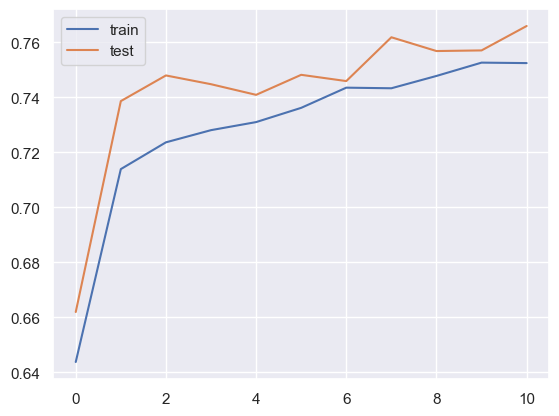

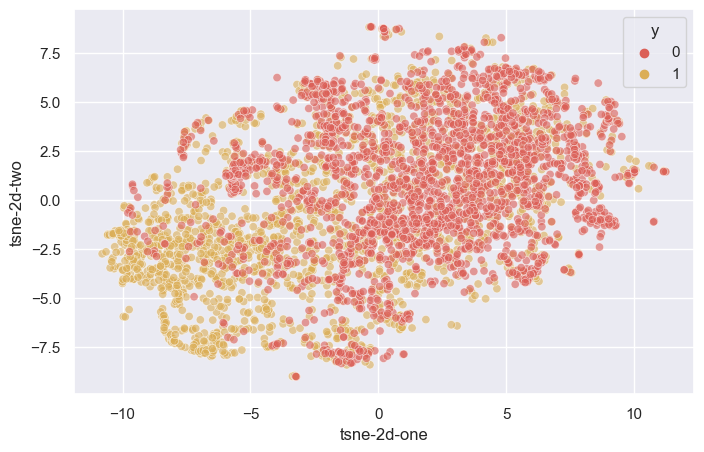

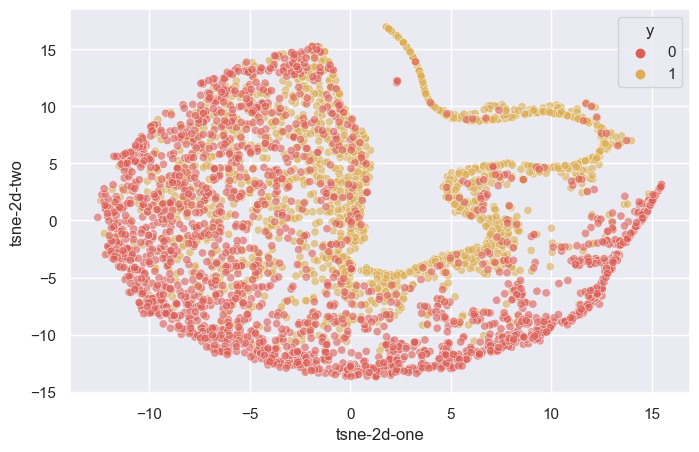

In [5]:
trainer.plot_history()
trainer.display_embeddings(use_model=False)
trainer.display_embeddings(use_model=True)

In [6]:
#import torch
#torch.save(model.state_dict(), "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Results\models\embedding_models\model_cosdist_acc_89.40.pth")